In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
pd.read_excel('Book1.xlsx').to_csv('Book1.csv', index=False)
data = pd.read_csv('Book1.csv')

In [30]:
data.insert(0, 'Vin', 1)

In [31]:
Av = data['Vout'] / data['Vin']
Av_dB = 20 * np.log10(Av)
data.insert(2, 'Av', Av_dB)

In [32]:
data

,Vin,Vout,Av,Freuency
0,1,0.019,-34.424928,1
1,1,0.045,-26.935750,2
2,1,0.113,-18.938431,3
3,1,0.550,-5.192746,4
4,1,0.835,-1.566270,5
5,1,0.920,-0.724243,8
6,1,0.994,-0.052272,10
7,1,1.070,0.587676,12
8,1,1.140,1.138097,15
9,1,1.250,1.938200,20


In [33]:
x = data['Freuency'].iloc[1:].astype(float)
y = data['Av'].iloc[1:].astype(float)

In [34]:
y

1    -26.935750
2    -18.938431
3     -5.192746
4     -1.566270
5     -0.724243
6     -0.052272
7      0.587676
8      1.138097
9      1.938200
10     2.345426
11     2.670778
12     2.922561
13     3.106721
14     3.287057
15     3.346347
16     3.405234
17     3.405234
18     3.463725
19     3.463725
20     3.463725
21     3.405234
22     3.405234
23     3.405234
24     3.106721
Name: Av, dtype: float64

In [35]:
from scipy.optimize import curve_fit

# Linear fit
def f(x, a, b):
    return a * x + b

popt, _ = curve_fit(f, x, y)

In [36]:
f(x, *popt)

1    -0.658220
2    -0.657587
3    -0.656953
4    -0.656320
5    -0.654419
6    -0.653152
7    -0.651885
8    -0.649985
9    -0.646817
10   -0.643650
11   -0.640482
12   -0.634147
13   -0.627812
14   -0.611974
15   -0.596137
16   -0.564461
17   -0.532786
18   -0.469436
19   -0.342735
20   -0.025982
21    0.607523
22    1.241029
23    2.508039
24    5.675566
Name: Freuency, dtype: float64

In [37]:
# Write data.csv to file
data.to_csv('data.csv', index=False)

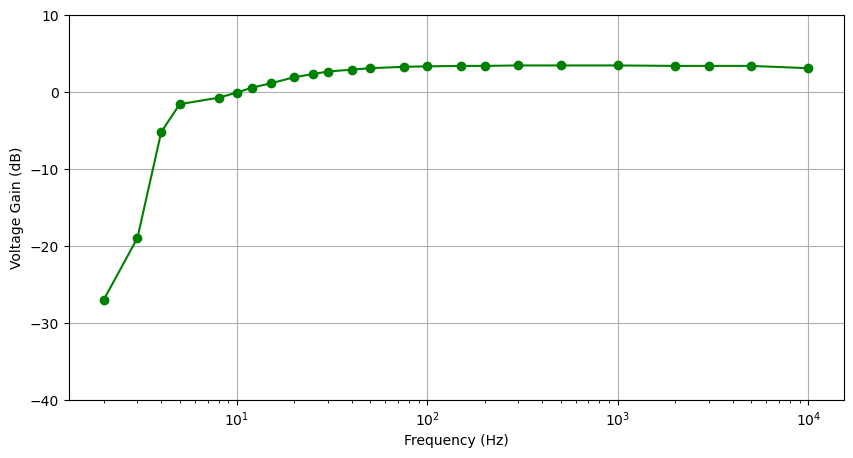

In [38]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Voltage Gain (dB)')
ax.plot(x, y, 'go-')
plt.ylim(-40, 10)
plt.grid();
# plt.plot(x, f(x, *popt), 'r-')

In [39]:
data2 = pd.read_csv('BPF.csv')

In [40]:
x = data2['F'].astype(float)
y = data2['Av'].astype(float)

KeyError: 'F'

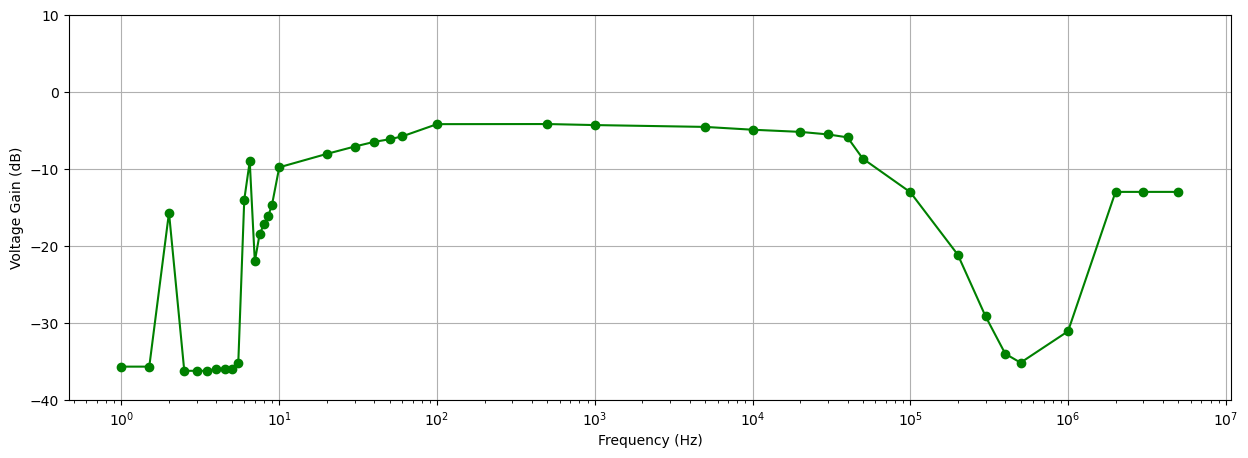

In [ ]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Voltage Gain (dB)')
ax.plot(x, y, 'go-')
plt.ylim(-40, 10)
plt.grid();

In [ ]:
print(data2.to_latex(index=False))

\begin{tabular}{rrrrr}
\toprule
        F &    log F &  Vin &  Vout &         Av \\
\midrule
      1.0 & 0.000000 &    2 & 0.033 & -35.650321 \\
      1.5 & 0.176091 &    2 & 0.033 & -35.650321 \\
      2.0 & 0.301030 &    2 & 0.330 & -15.650321 \\
      2.5 & 0.397940 &    2 & 0.031 & -36.193366 \\
      3.0 & 0.477121 &    2 & 0.031 & -36.193366 \\
      3.5 & 0.544068 &    2 & 0.031 & -36.193366 \\
      4.0 & 0.602060 &    2 & 0.032 & -35.917600 \\
      4.5 & 0.653213 &    2 & 0.032 & -35.917600 \\
      5.0 & 0.698970 &    2 & 0.032 & -35.917600 \\
      5.5 & 0.740363 &    2 & 0.035 & -35.139239 \\
      6.0 & 0.778151 &    2 & 0.400 & -13.979400 \\
      6.5 & 0.812913 &    2 & 0.710 &  -8.995433 \\
      7.0 & 0.845098 &    2 & 0.159 & -21.992657 \\
      7.5 & 0.875061 &    2 & 0.238 & -18.489061 \\
      8.0 & 0.903090 &    2 & 0.278 & -17.139704 \\
      8.5 & 0.929419 &    2 & 0.312 & -16.137508 \\
      9.0 & 0.954243 &    2 & 0.372 & -14.609741 \\
     10.0 & 1.000000 & 

/tmp/ipykernel_4110/420312367.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(data2.to_latex(index=False))


In [ ]:
data3 = pd.read_csv('BPF.csv')

In [ ]:
x = data3['frequency'].astype(float)
y = data3['Av'].astype(float)

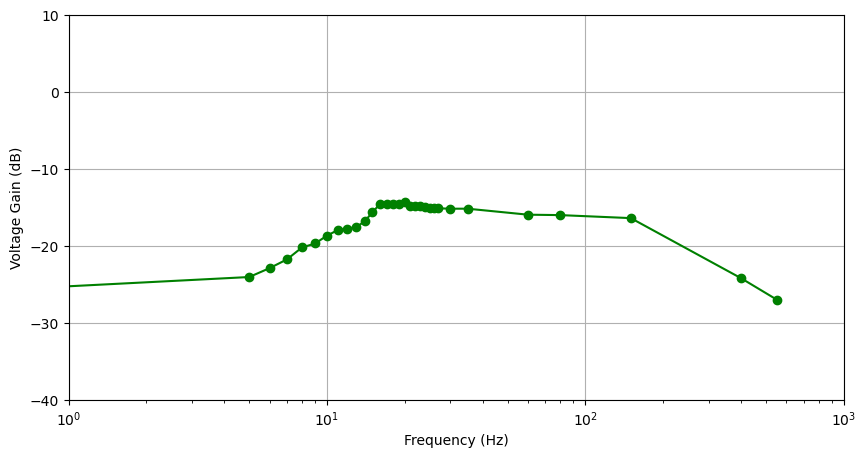

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Voltage Gain (dB)')
ax.plot(x, y, 'go-')
plt.ylim(-40, 10)
plt.xlim(1e0, 1e3)
plt.grid();

In [ ]:
print(data3.to_latex(index=False))

\begin{tabular}{rrrr}
\toprule
 Vin &  Vout &  frequency &         Av \\
\midrule
   1 & 0.045 &        0.1 & -26.935750 \\
   1 & 0.063 &        5.0 & -24.013189 \\
   1 & 0.072 &        6.0 & -22.853350 \\
   1 & 0.082 &        7.0 & -21.723723 \\
   1 & 0.098 &        8.0 & -20.175478 \\
   1 & 0.104 &        9.0 & -19.659333 \\
   1 & 0.117 &       10.0 & -18.636283 \\
   1 & 0.127 &       11.0 & -17.923926 \\
   1 & 0.130 &       12.0 & -17.721133 \\
   1 & 0.133 &       13.0 & -17.522967 \\
   1 & 0.145 &       14.0 & -16.772640 \\
   1 & 0.166 &       15.0 & -15.597838 \\
   1 & 0.187 &       16.0 & -14.563168 \\
   1 & 0.187 &       17.0 & -14.563168 \\
   1 & 0.187 &       18.0 & -14.563168 \\
   1 & 0.187 &       19.0 & -14.563168 \\
   1 & 0.192 &       20.0 & -14.333975 \\
   1 & 0.182 &       21.0 & -14.798572 \\
   1 & 0.182 &       22.0 & -14.798572 \\
   1 & 0.182 &       23.0 & -14.798572 \\
   1 & 0.179 &       24.0 & -14.942939 \\
   1 & 0.176 &       25.0 & -15.0897

/tmp/ipykernel_4110/2078192212.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(data3.to_latex(index=False))


In [ ]:
fr_simul = pd.read_excel('FR.xlsx', sheet_name='Simul')
fr_prac = pd.read_excel('FR.xlsx', sheet_name='Prac')

In [ ]:
x_sim = fr_simul['Frequency'].astype(float)
y_sim = fr_simul['Gain (dB)'].astype(float)

x_prac = fr_prac['Frequency'].astype(float)
y_prac = fr_prac['Gain (dB)'].astype(float)

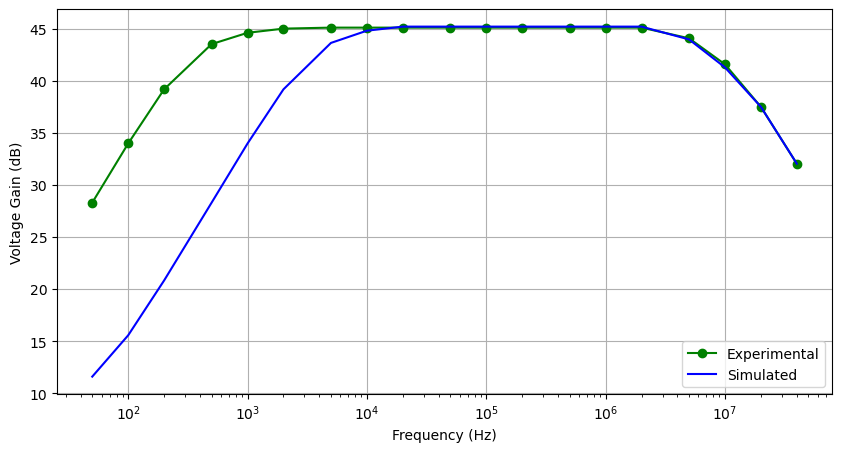

In [ ]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Voltage Gain (dB)')
ax.plot(x_prac, y_prac, 'go-', label='Experimental')
ax.plot(x_sim, y_sim, 'b-', label='Simulated')
plt.legend()
plt.grid()

In [ ]:
print(fr_simul.to_latex(index=False))

\begin{tabular}{rrrrrr}
\toprule
 Vin (mV) &  Frequency &  Logarithmic Frequency &  Vout (mV) &    Av &  Gain (dB) \\
\midrule
      100 &         50 &                1.69897 &        380 &   3.8 &  11.595672 \\
      100 &        100 &                2.00000 &        600 &   6.0 &  15.563025 \\
      100 &        200 &                2.30103 &       1100 &  11.0 &  20.827854 \\
      100 &        500 &                2.69897 &       2600 &  26.0 &  28.299467 \\
      100 &       1000 &                3.00000 &       5000 &  50.0 &  33.979400 \\
      100 &       2000 &                3.30103 &       9100 &  91.0 &  39.180828 \\
      100 &       5000 &                3.69897 &      15200 & 152.0 &  43.636872 \\
      100 &      10000 &                4.00000 &      17400 & 174.0 &  44.810985 \\
      100 &      20000 &                4.30103 &      18200 & 182.0 &  45.201428 \\
      100 &      50000 &                4.69897 &      18200 & 182.0 &  45.201428 \\
      100 &     100000 

/tmp/ipykernel_16408/796649094.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(fr_simul.to_latex(index=False))


In [ ]:
print(fr_prac.to_latex(index=False))

\begin{tabular}{rrrrrr}
\toprule
 Vin (mV) &  Frequency &  Logarithmic Frequency &  Vout (mV) &  Av &  Gain (dB) \\
\midrule
      100 &         50 &                1.69897 &       2600 &  26 &  28.299467 \\
      100 &        100 &                2.00000 &       5000 &  50 &  33.979400 \\
      100 &        200 &                2.30103 &       9100 &  91 &  39.180828 \\
      100 &        500 &                2.69897 &      15000 & 150 &  43.521825 \\
      100 &       1000 &                3.00000 &      17000 & 170 &  44.608978 \\
      100 &       2000 &                3.30103 &      17800 & 178 &  45.008400 \\
      100 &       5000 &                3.69897 &      18000 & 180 &  45.105450 \\
      100 &      10000 &                4.00000 &      18000 & 180 &  45.105450 \\
      100 &      20000 &                4.30103 &      18000 & 180 &  45.105450 \\
      100 &      50000 &                4.69897 &      18000 & 180 &  45.105450 \\
      100 &     100000 &                5.000

/tmp/ipykernel_16408/491035810.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(fr_prac.to_latex(index=False))


In [41]:
lpf = pd.read_csv('LPF.csv')
lpf

,Vin (V),Frequency (Hz),Practical Data\nAv (dB),Simulated Data\nAv (dB)
0,1,0.1,4.959465,4.959465
1,1,1.0,5.249022,4.959465
2,1,1.5,5.057061,4.860761
3,1,2.0,5.343435,4.810985
4,1,2.5,5.436832,4.959465
5,1,3.0,5.620667,4.910253
6,1,3.5,5.666025,5.057061
7,1,4.0,6.277344,5.153571
8,1,4.5,6.648769,5.249022
9,1,5.0,6.808882,5.249022


In [42]:
print(lpf.to_latex(index=False))

\begin{tabular}{rrrr}
\toprule
 Vin (V) &  Frequency (Hz) &  Practical Data\textbackslash nAv (dB) &  Simulated Data\textbackslash nAv (dB) \\
\midrule
       1 &             0.1 &                 4.959465 &                 4.959465 \\
       1 &             1.0 &                 5.249022 &                 4.959465 \\
       1 &             1.5 &                 5.057061 &                 4.860761 \\
       1 &             2.0 &                 5.343435 &                 4.810985 \\
       1 &             2.5 &                 5.436832 &                 4.959465 \\
       1 &             3.0 &                 5.620667 &                 4.910253 \\
       1 &             3.5 &                 5.666025 &                 5.057061 \\
       1 &             4.0 &                 6.277344 &                 5.153571 \\
       1 &             4.5 &                 6.648769 &                 5.249022 \\
       1 &             5.0 &                 6.808882 &                 5.249022 \\
       1

/tmp/ipykernel_25195/2255270794.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(lpf.to_latex(index=False))


In [43]:
x = lpf['Frequency (Hz)'].astype(float)
y1 = lpf['Practical Data\nAv (dB)'].astype(float)
y2 = lpf['Simulated Data\nAv (dB)'].astype(float)

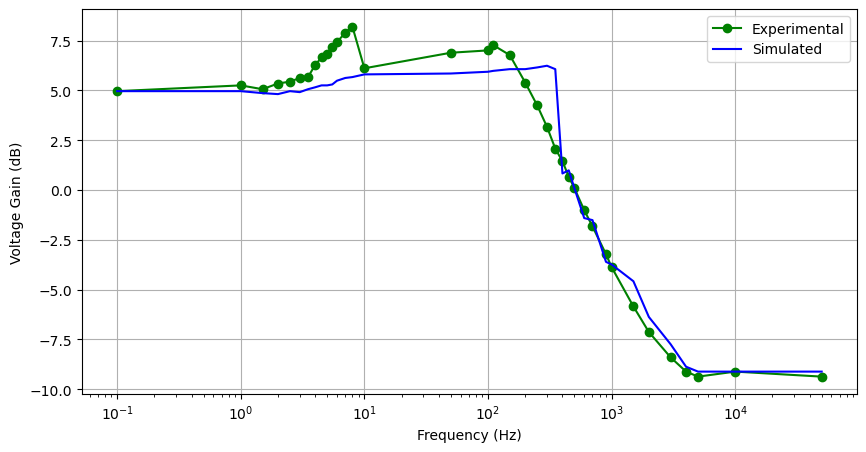

In [44]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Voltage Gain (dB)')
ax.plot(x, y1, 'go-', label='Experimental')
ax.plot(x, y2, 'b-', label='Simulated')
plt.legend()
plt.grid()